# Машинное обучение, ФКН ВШЭ

## Практическое задание 3. Градиентный спуск своими руками

### Общая информация
Дата выдачи: **12.10.2021**

Мягкий дедлайн: **25.10.21 23:59** (за каждый день просрочки снимается 1 балл)

Жесткий дедлайн: **28.10.21 23:59**

### О задании

В данном задании необходимо реализовать обучение линейной регрессии с помощью различных вариантов градиентного спуска.


### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов + 2 балла бонус.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.
Также оценка может быть снижена за плохо читаемый код и плохо считываемые диаграммы.

Все ответы должны сопровождаться кодом или комментариями о том, как они были получены.


### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно найти на странице курса. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-03-gd-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

**Оценка**: ...

Напомним, что на лекциях и семинарах мы разбирали некоторые подходы к оптимизации функционалов по параметрам. В частности, был рассмотрен градиентный спуск и различные подходы к его реализации — полный градиентный спуск, стохастический градиентный спуск, метод импульса и другие. В качестве модели у нас будет выступать линейная регрессия.

В этом домашнем задании вам предстоит реализовать 4 различных вариации градиентного спуска, написать свою реализацию линейной регресии, сравнить методы градиентного спуска между собой на реальных данных и ещё много чего веселого и интересного!

## Задание 1. Реализация градиентного спуска (3.5 балла)

В этом задании вам предстоит написать собственные реализации различных подходов к градиентному спуску с опорой на подготовленные шаблоны в файле `descents.py`.

**Все реализуемые методы должны быть векторизованы!**

### Лирическое-теоретическое отступление № 1

Основное свойство антиградиента &ndash; он указывает в сторону наискорейшего убывания функции в данной точке. Соответственно, будет логично стартовать из некоторой точки, сдвинуться в сторону антиградиента,
пересчитать антиградиент и снова сдвинуться в его сторону и т.д. Запишем это более формально.

Пусть $w_0$ &ndash; начальный набор параметров (например, нулевой или сгенерированный из некоторого
случайного распределения). Тогда ванильный градиентный спуск состоит в повторении следующих шагов до сходимости:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

### Лирическое-теоретическое отступление № 2

На семинаре про [матрично-векторное дифференцирование](https://github.com/esokolov/ml-course-hse/blob/master/2021-fall/seminars/sem03-vector-diff.pdf) вы должны были обсуждать дифференцирование функции потерь MSE в матричном виде.

### Задание 1.0. Градиент MSE в матричном виде (0 баллов).

Напомним, что функция потерь MSE записывается в матричном виде как:

$$
    Q(w) = \dfrac{1}{\ell} \left( y - Xw \right)^T \left( y - Xw \right)
$$

Выпишите ниже (подсмотрев в семинар или решив самостоятельно) градиент для функции потерь MSE в матричном виде.

`### ваше решение тут ###`

### Задание 1.1. Родительский класс BaseDescent (0.5 балла).

Реализуйте функции `calc_loss` (вычисление MSE для переданных $x$ и $y$) и `predict` (предсказание $y_{pred}$ для переданных $x$) в классе `BaseDescent`.

Все вычисления должны быть векторизованы.

### Задание 1.2. Полный градиентный спуск VanillaGradientDescent (0.5 балла).

Реализуйте полный градиентный спуск заполнив пропуски в классе `VanillaGradientDescent` в файле `descents.py`. Для вычисления градиента используйте формулу выше. Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \nabla_{w} Q(w_{k}).
$$

Здесь и далее функция `update_weights` должна возвращать разницу между $w_{k + 1}$ и $w_{k}$: $\quad w_{k + 1} - w_{k} = -\eta_{k} \nabla_{w} Q(w_{k})$.

Во всех методах градиентного спуска мы будем использовать следующую формулу для длины шага:

$$
    \eta_{k} = \lambda \left(\dfrac{s_0}{s_0 + k}\right)^p
$$

На практике достаточно настроить параметр $\lambda$, а остальным выставить параметры по умолчанию: $s_0 = 1, \, p = 0.5.$

### Лирическое-теоретическое отступление № 3

Как правило, в задачах машинного обучения функционал $Q(w)$ представим в виде суммы $\ell$ функций:

$$
    Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        q_i(w).
$$

В нашем домашнем задании отдельные функции $q_i(w)$ соответствуют ошибкам на отдельных объектах.

Проблема метода градиентного спуска состоит в том, что на каждом шаге необходимо вычислять градиент всей суммы (будем его называть полным градиентом):

$$
    \nabla_w Q(w)
    =
    \frac{1}{\ell}
    \sum_{i = 1}^{\ell}
        \nabla_w q_i(w).
$$

Это может быть очень трудоёмко при больших размерах выборки. В то же время точное вычисление градиента может быть не так уж необходимо &ndash; как правило, мы делаем не очень большие шаги в сторону антиградиента, и наличие в нём неточностей не должно сильно сказаться на общей траектории.

Оценить градиент суммы функций можно средним градиентов случайно взятого подмножества функций:

$$
    \nabla_{w} Q(w_{k}) \approx \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}),
$$
где $B$ - это случайно выбранное подмножество индексов.

В этом случае мы получим метод **стохастического градиентного спуска**.

### Задание 1.3. Стохастический градиентный спуск StochasticDescent (0.5 балла).

Реализуйте стохастический градиентный спуск заполнив пропуски в классе `StochasticDescent`. Для оценки градиента используйте формулу выше (среднее градиентов случайно выбранного батча объектов). Шаг оптимизации:

$$
    w_{k + 1} = w_{k} - \eta_{k} \dfrac{1}{|B|}\sum\limits_{i \in B}\nabla_{w} q_{i}(w_{k}).
$$

Размер батча будет являться гиперпараметром метода, семплируйте индексы для батча объектов с помощью `np.random.randint`.

### Лирическое-теоретическое отступление № 4

Может оказаться, что направление антиградиента сильно меняется от шага к шагу. Например, если линии уровня функционала сильно вытянуты, то из-за ортогональности градиента линиям уровня он будет менять направление на почти противоположное на каждом шаге. Такие осцилляции будут вносить сильный шум в движение, и процесс оптимизации займёт много итераций. Чтобы избежать этого, можно усреднять векторы антиградиента с нескольких предыдущих шагов &ndash; в этом случае шум уменьшится, и такой средний вектор будет указывать в сторону общего направления движения. Введём для этого вектор инерции:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k})
\end{align}

Здесь $\alpha$ &ndash; параметр метода, определяющей скорость затухания градиентов с предыдущих шагов. Разумеется, вместо вектора градиента может быть использована его аппроксимация. Чтобы сделать шаг градиентного спуска, просто сдвинем предыдущую точку на вектор инерции:

$$
    w_{k + 1} = w_{k} - h_{k + 1}.
$$

Заметим, что если по какой-то координате градиент постоянно меняет знак, то в результате усреднения градиентов в векторе инерции эта координата окажется близкой к нулю. Если же по координате знак градиента всегда одинаковый, то величина соответствующей координаты в векторе инерции будет большой, и мы будем делать большие шаги в соответствующем направлении.

### Задание 1.4 Метод Momentum MomentumDescent (0.5 балла).

Реализуйте градиентный спуск с методом инерции заполнив пропуски в классе `MomentumDescent`. Шаг оптимизации:

\begin{align}
    &h_0 = 0, \\
    &h_{k + 1} = \alpha h_{k} + \eta_k \nabla_w Q(w_{k}) \\
    &w_{k + 1} = w_{k} - h_{k + 1}.
\end{align}

$\alpha$ будет являться гиперпараметром метода, но в данном домашнем задании мы зафиксируем её за вас $\alpha = 0.9$.

### Лирическое-теоретическое отступление № 5

Градиентный спуск очень чувствителен к выбору длины шага. Если шаг большой, то есть риск, что мы будем перескакивать через точку минимума; если же шаг маленький, то для нахождения минимума потребуется много итераций. При этом нет способов заранее определить правильный размер шага &ndash; к тому же, схемы с постепенным уменьшением шага по мере итераций могут тоже плохо работать.

В методе AdaGrad предлагается сделать свою длину шага для каждой компоненты вектора параметров. При этом шаг будет тем меньше, чем более длинные шаги мы делали на предыдущих итерациях:

\begin{align}
    &G_{kj} = G_{k-1,j} + (\nabla_w Q(w_{k - 1}))_j^2; \\
    &w_{jk} = w_{j,k-1} - \frac{\eta_t}{\sqrt{G_{kj}} + \varepsilon} (\nabla_w Q(w_{k - 1}))_j.
\end{align}

Здесь $\varepsilon$ небольшая константа, которая предотвращает деление на ноль.

В данном методе можно зафксировать длину шага (например, $\eta_k = 0.01$) и не подбирать её в процессе обучения. Отметим, что данный метод подходит для разреженных задач, в которых у каждого объекта большинство признаков равны нулю. Для признаков, у которых ненулевые значения встречаются редко, будут делаться большие шаги; если же какой-то признак часто является ненулевым, то шаги по нему будут небольшими.

У метода AdaGrad есть большой недостаток: переменная $G_{kj}$ монотонно растёт, из-за чего шаги становятся всё медленнее и могут остановиться ещё до того, как достигнут минимум функционала. Проблема решается в методе RMSprop, где используется экспоненциальное затухание градиентов:

$$
    G_{kj} = \alpha G_{k-1,j} + (1 - \alpha) (\nabla_w Q(w^{(k-1)}))_j^2.
$$

В этом случае размер шага по координате зависит в основном от того, насколько
быстро мы двигались по ней на последних итерациях.

Можно объединить идеи описанных выше методов: накапливать градиенты со всех прошлых шагов для
избежания осцилляций и делать адаптивную длину шага по каждому параметру.

### Задание 1.5. Метод Adam (Adaptive Moment Estimation) (1.5 балла).

![](adam.jpg)

Реализуйте градиентный спуск с методом Adam заполнив пропуски в классе `Adam`. Шаг оптимизации:

\begin{align}
    &m_0 = 0, \quad v_0 = 0; \\ \\
    &m_{k + 1} = \beta_1 m_k + (1 - \beta_1) \nabla_w Q(w_{k}); \\ \\
    &v_{k + 1} = \beta_2 v_k + (1 - \beta_2) \left(\nabla_w Q(w_{k})\right)^2; \\ \\
    &\widehat{m}_{k} = \dfrac{m_k}{1 - \beta_1^{k}}, \quad \widehat{v}_{k} = \dfrac{v_k}{1 - \beta_2^{k}}; \\ \\
    &w_{k + 1} = w_{k} - \dfrac{\eta_k}{\sqrt{\widehat{v}_{k + 1}} + \varepsilon} \widehat{m}_{k + 1}.
\end{align}

$\beta_1 = 0.9, \beta_2 = 0.999$ и $\varepsilon = 10^{-8}$ будут зафиксированы за вас.

## Задание 2. Реализация линейной регресии (0.5 балла)

В этом задании вам предстоит написать свою реализацию линейной регресии, обучаемой с использованием градиентного спуска, с опорой на подготовленные шаблоны в файле `linear_regression.py` - **LinearRegression**. По сути линейная регрессия будет оберткой, которая запускает обучение 

Необходимо соблюдать следующие условия:

* Все вычисления должны быть векторизованы;
* Циклы средствами python допускаются только для итераций градиентного спуска;
* В качестве критерия останова необходимо использовать (одновременно):
    * Квадрат евклидовой нормы разности весов на двух соседних итерациях меньше `tolerance`;
    * Разность весов содержит наны;
    * Достижение максимального числа итераций `max_iter`.
* Будем считать, что все данные, которые поступают на вход имеют столбец единичек последним столбцом;
* Чтобы проследить за сходимостью оптимизационного процесса будем использовать `loss_history`, в нём будем хранить значения функции потерь до каждого шага, начиная с нулевого (до первого шага по антиградиенту) и значение функции потерь после оптимизации.

## Задание 3. Проверка кода (0 баллов)

In [2]:
%load_ext autoreload

In [3]:
%autoreload 2

import numpy as np

from descents import get_descent
from linear_regression import LinearRegression

In [4]:
num_objects = 100
dimension = 5

x = np.random.rand(num_objects, dimension)
y = np.random.rand(num_objects)

In [5]:
# Descents

descent_config = {
    'descent_name': 'some name that we will replace in the future',
    'kwargs': {
        'dimension': dimension
    }
}

for descent_name in ['full', 'stochastic', 'momentum', 'adam']:
    descent_config['descent_name'] = descent_name
    descent = get_descent(descent_config)

    diff = descent.step(x, y)
    gradient = descent.calc_gradient(x, y)
    predictions = descent.predict(x)

    assert gradient.shape[0] == dimension, f'Gradient failed for descent {descent_name}'
    assert diff.shape[0] == dimension, f'Weights failed for descent {descent_name}'
    assert predictions.shape == y.shape, f'Prediction failed for descent {descent_name}'

In [6]:
# LinearRegression

max_iter = 10
tolerance = 0

descent_config = {
    'descent_name': 'stochastic',
    'kwargs': {
        'dimension': dimension,
        'batch_size': 10
    }
}

regression = LinearRegression(
    descent_config=descent_config,
    tolerance=tolerance,
    max_iter=max_iter
)

regression.fit(x, y)

assert len(regression.loss_history) == max_iter + 1, 'Loss history failed'

Если ваше решение прошло все тесты локально, то теперь пришло время протестировать его в [Яндекс Контесте](https://contest.yandex.ru/contest/29933/enter/).

Для каждой задачи из контеста вставьте ссылку на успешную посылку:

* **VanillaGradientDescent**:

https://contest.yandex.ru/contest/29933/run-report/55111343/

* **StochasticDescent**:

https://contest.yandex.ru/contest/29933/run-report/55111402/

* **MomentumDescent**:

https://contest.yandex.ru/contest/29933/run-report/55111462/

* **Adam**:

https://contest.yandex.ru/contest/29933/run-report/55111480/

* **LinearRegression**:

https://contest.yandex.ru/contest/29933/run-report/55111505/

## Задание 4. Работа с данными (1 балл)

Мы будем использовать датасет объявлений по продаже машин на немецком Ebay. В задаче предсказания целевой переменной для нас будет являться цена.

* Постройте график распределения целевой переменной в данных, подумайте, нужно ли заменить её на логарифм. Присутствуют ли выбросы в данных с аномальной ценой? Если да, то удалите их из данных.

* Проведите исследование данных:
    * Проанализируйте тип столбцов, постройте графики зависимости целевой переменной от признака, распределения значений признака;
    * Подумайте, какие признаки могут быть полезными на основе этих графиков, обработайте выбросы;
    * Подумайте, какие трансформации признаков из известных вам будет уместно применить;
    * Разделите полезные признаки на категориальные, вещественные и те, которые не надо предобрабатывать.
* Разделите данные на обучающую, валидационную и тестовую выборки в отношении 8:1:1.

In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from descents import get_descent
from linear_regression import LinearRegression

sns.set(style='darkgrid')

In [8]:
data = pd.read_csv('autos.csv')

In [9]:
data.head()

,brand,model,vehicleType,gearbox,fuelType,notRepairedDamage,powerPS,kilometer,autoAgeMonths,price
0,volkswagen,golf,kleinwagen,manuell,benzin,nein,75,150000,177,1500
1,skoda,fabia,kleinwagen,manuell,diesel,nein,69,90000,93,3600
2,bmw,3er,limousine,manuell,benzin,ja,102,150000,246,650
3,peugeot,2_reihe,cabrio,manuell,benzin,nein,109,150000,140,2200
4,mazda,3_reihe,limousine,manuell,benzin,nein,105,150000,136,2000


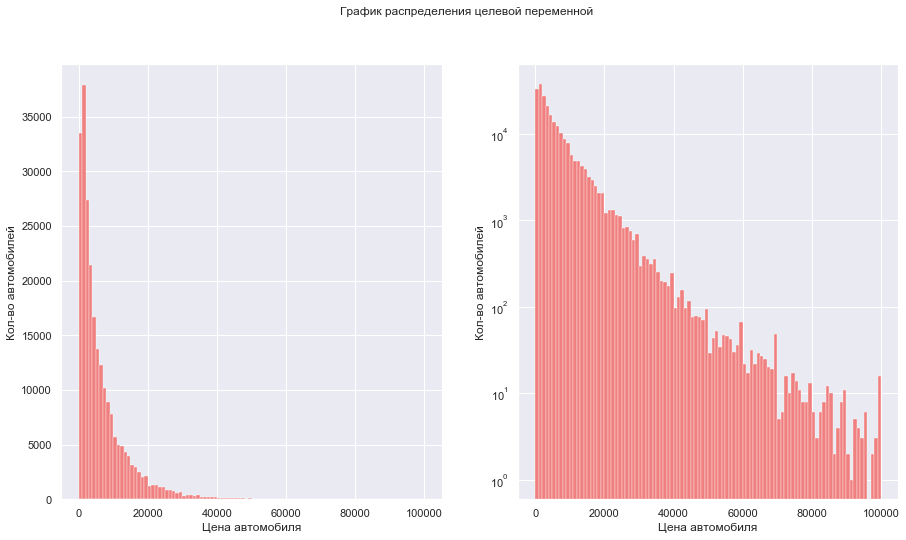

In [10]:
fig , ax = plt.subplots(nrows = 1, ncols = 2, figsize=(15, 8))
sns.histplot(data = data, x = 'price', bins=100, color='lightcoral', alpha=1, ax=ax[0])
sec = sns.histplot(data = data, x = 'price', bins=100, color='lightcoral', alpha=1, log_scale=(False, True), ax=ax[1])

ax[0].set_xlabel("Цена автомобиля")
ax[0].set_ylabel("Кол-во автомобилей")
ax[1].set_xlabel("Цена автомобиля")
ax[1].set_ylabel("Кол-во автомобилей")
fig.suptitle("График распределения целевой переменной")
plt.show()

In [11]:
data.drop(data[data.price > 65000].index, inplace=True)

In [12]:
data.dtypes

brand                object
model                object
vehicleType          object
gearbox              object
fuelType             object
notRepairedDamage    object
powerPS               int64
kilometer             int64
autoAgeMonths         int64
price                 int64
dtype: object

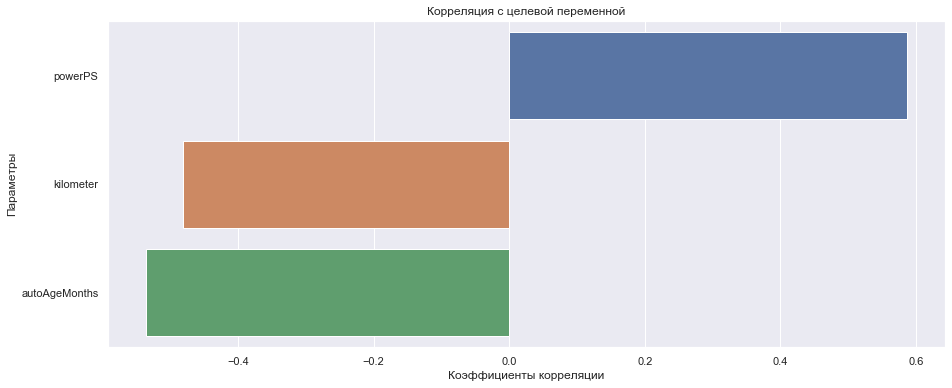

In [13]:
tmp = data.drop(['price'], axis=1)
numeric_data = tmp.select_dtypes([np.number])
numeric_features = numeric_data.columns
correlations = tmp[numeric_features].corrwith(data.price).sort_values(ascending=False)


plot = sns.barplot(y=correlations.index, x=correlations)
plot.set(xlabel='Коэффициенты корреляции', ylabel='Параметры', title="Корреляция с целевой переменной")
plot.figure.set_size_inches(15, 6)

In [14]:
tmp = pd.DataFrame(data.value_counts(subset=['price', 'autoAgeMonths'])).reset_index()
tmp.autoAgeMonths = round(tmp.autoAgeMonths / 10) * 10
tmp = pd.DataFrame(tmp.value_counts(subset=['price', 'autoAgeMonths'])).reset_index()

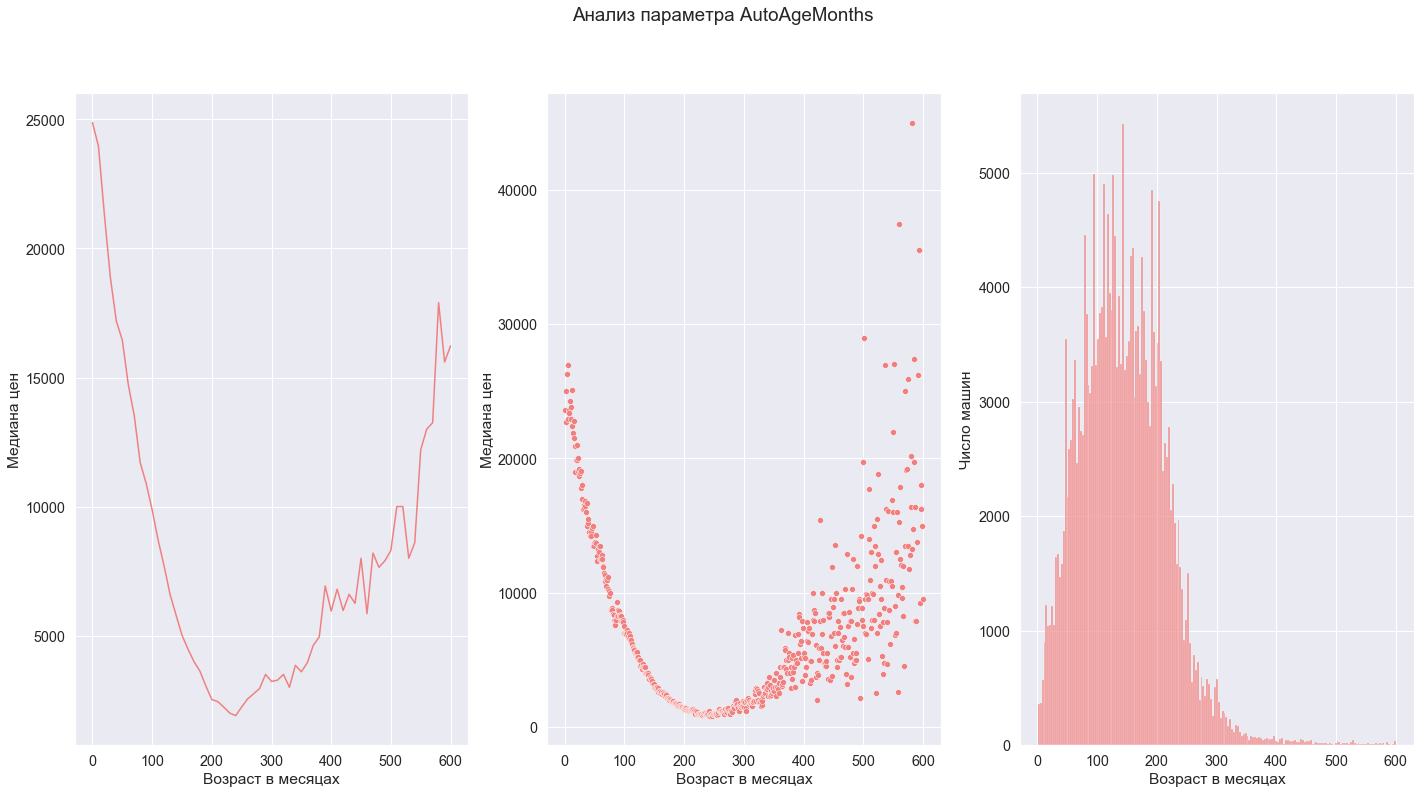

In [15]:
sns.set(font_scale=1.3)
fig , ax = plt.subplots(nrows = 1, ncols = 3, figsize=(24, 12))
sns.lineplot(ax=ax[0], x = sorted(tmp.autoAgeMonths.unique()), y = tmp.groupby(['autoAgeMonths']).price.median(), 
                   color='lightcoral')
ax[0].set(xlabel='Возраст в месяцах', ylabel='Медиана цен')
sns.scatterplot(ax=ax[1], x = sorted(data.autoAgeMonths.unique()), y = data.groupby(['autoAgeMonths']).price.median(), 
                   color='lightcoral')
ax[1].set(xlabel='Возраст в месяцах', ylabel='Медиана цен')
sns.histplot(ax=ax[2], x = data.autoAgeMonths, color='lightcoral')
ax[2].set(xlabel='Возраст в месяцах', ylabel='Число машин')
fig.suptitle("Анализ параметра AutoAgeMonths")
plt.show()

In [16]:
tmp = pd.DataFrame(data.value_counts(subset=['price', 'powerPS'])).reset_index()
tmp.price = round(tmp.price / 10000) * 10000
tmp.powerPS = round(tmp.powerPS / 10) * 10
tmp = pd.DataFrame(tmp.value_counts(subset=['price', 'powerPS'])).reset_index()

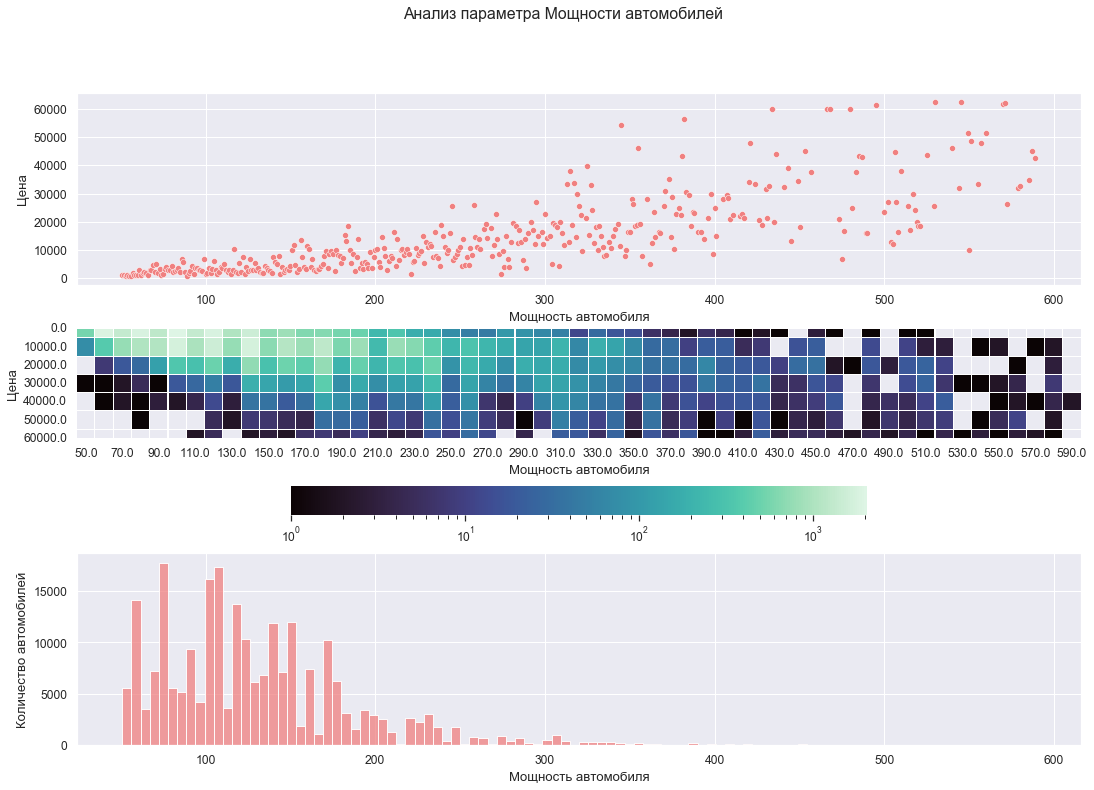

In [17]:
sns.set(font_scale=1.1)
from matplotlib.colors import LogNorm
fig , ax = plt.subplots(nrows = 3, ncols = 1, figsize=(18, 12))
fig.suptitle("Анализ параметра Мощности автомобилей")
sns.scatterplot(ax=ax[0], x = sorted(data.powerPS.unique()), y = data.groupby(['powerPS']).price.median(), 
                   color='lightcoral')
ax[0].set(xlabel='Мощность автомобиля', ylabel='Цена')
sns.heatmap(tmp.pivot('price', 'powerPS', 0), cmap='mako', square=True, ax=ax[1], linewidths=0.05, xticklabels=2,
            norm=LogNorm(), cbar_kws={"orientation": "horizontal", "pad": 0.25})
ax[1].set(xlabel='Мощность автомобиля', ylabel='Цена')
sns.histplot(ax=ax[2], x = data.powerPS, color='lightcoral', bins=100)
ax[2].set(xlabel='Мощность автомобиля', ylabel='Количество автомобилей')
plt.show()

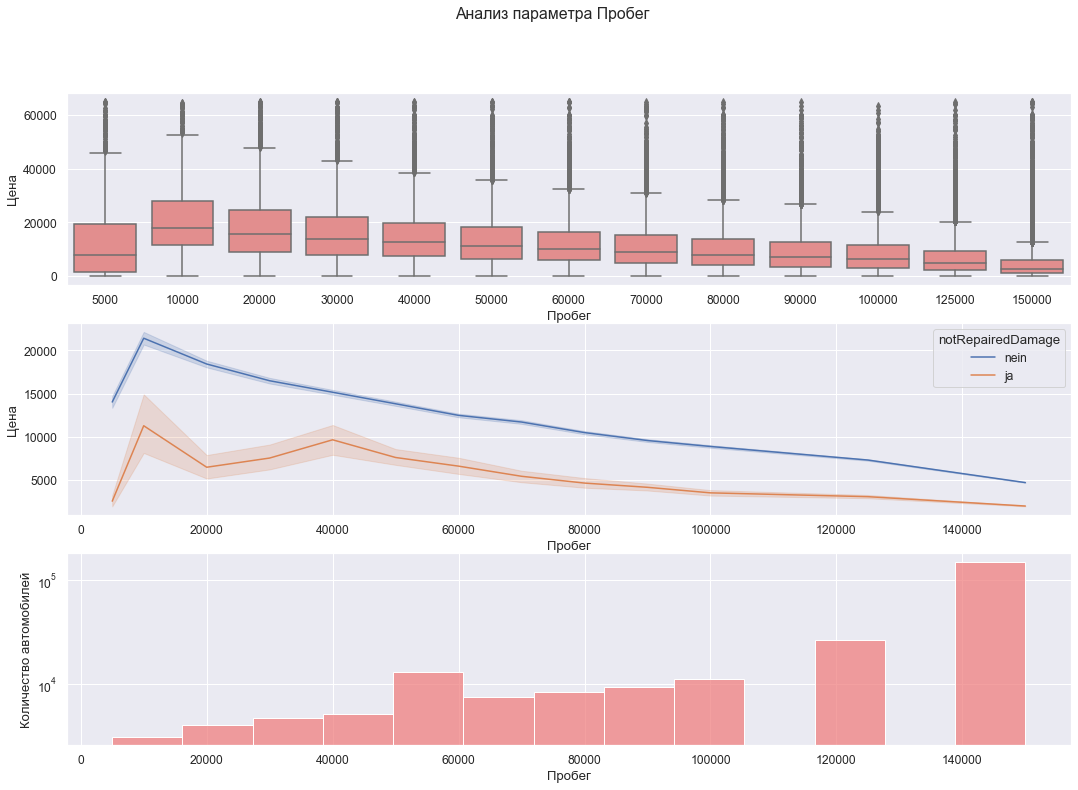

In [18]:
fig , ax = plt.subplots(nrows = 3, ncols = 1, figsize=(18, 12))
fig.suptitle("Анализ параметра Пробег")
one = sns.boxplot(data = data, x = 'kilometer', y = 'price', color='lightcoral', ax=ax[0])
one.set(xlabel='Пробег', ylabel='Цена')
two = sns.lineplot(data = data, x = 'kilometer', y = 'price', color='lightcoral', ax=ax[1], hue='notRepairedDamage')
two.set(xlabel='Пробег', ylabel='Цена')
sns.histplot(ax=ax[2], x = data.kilometer, color='lightcoral', log_scale=(False, True), bins=13)
ax[2].set(xlabel='Пробег', ylabel='Количество автомобилей')
plt.show()

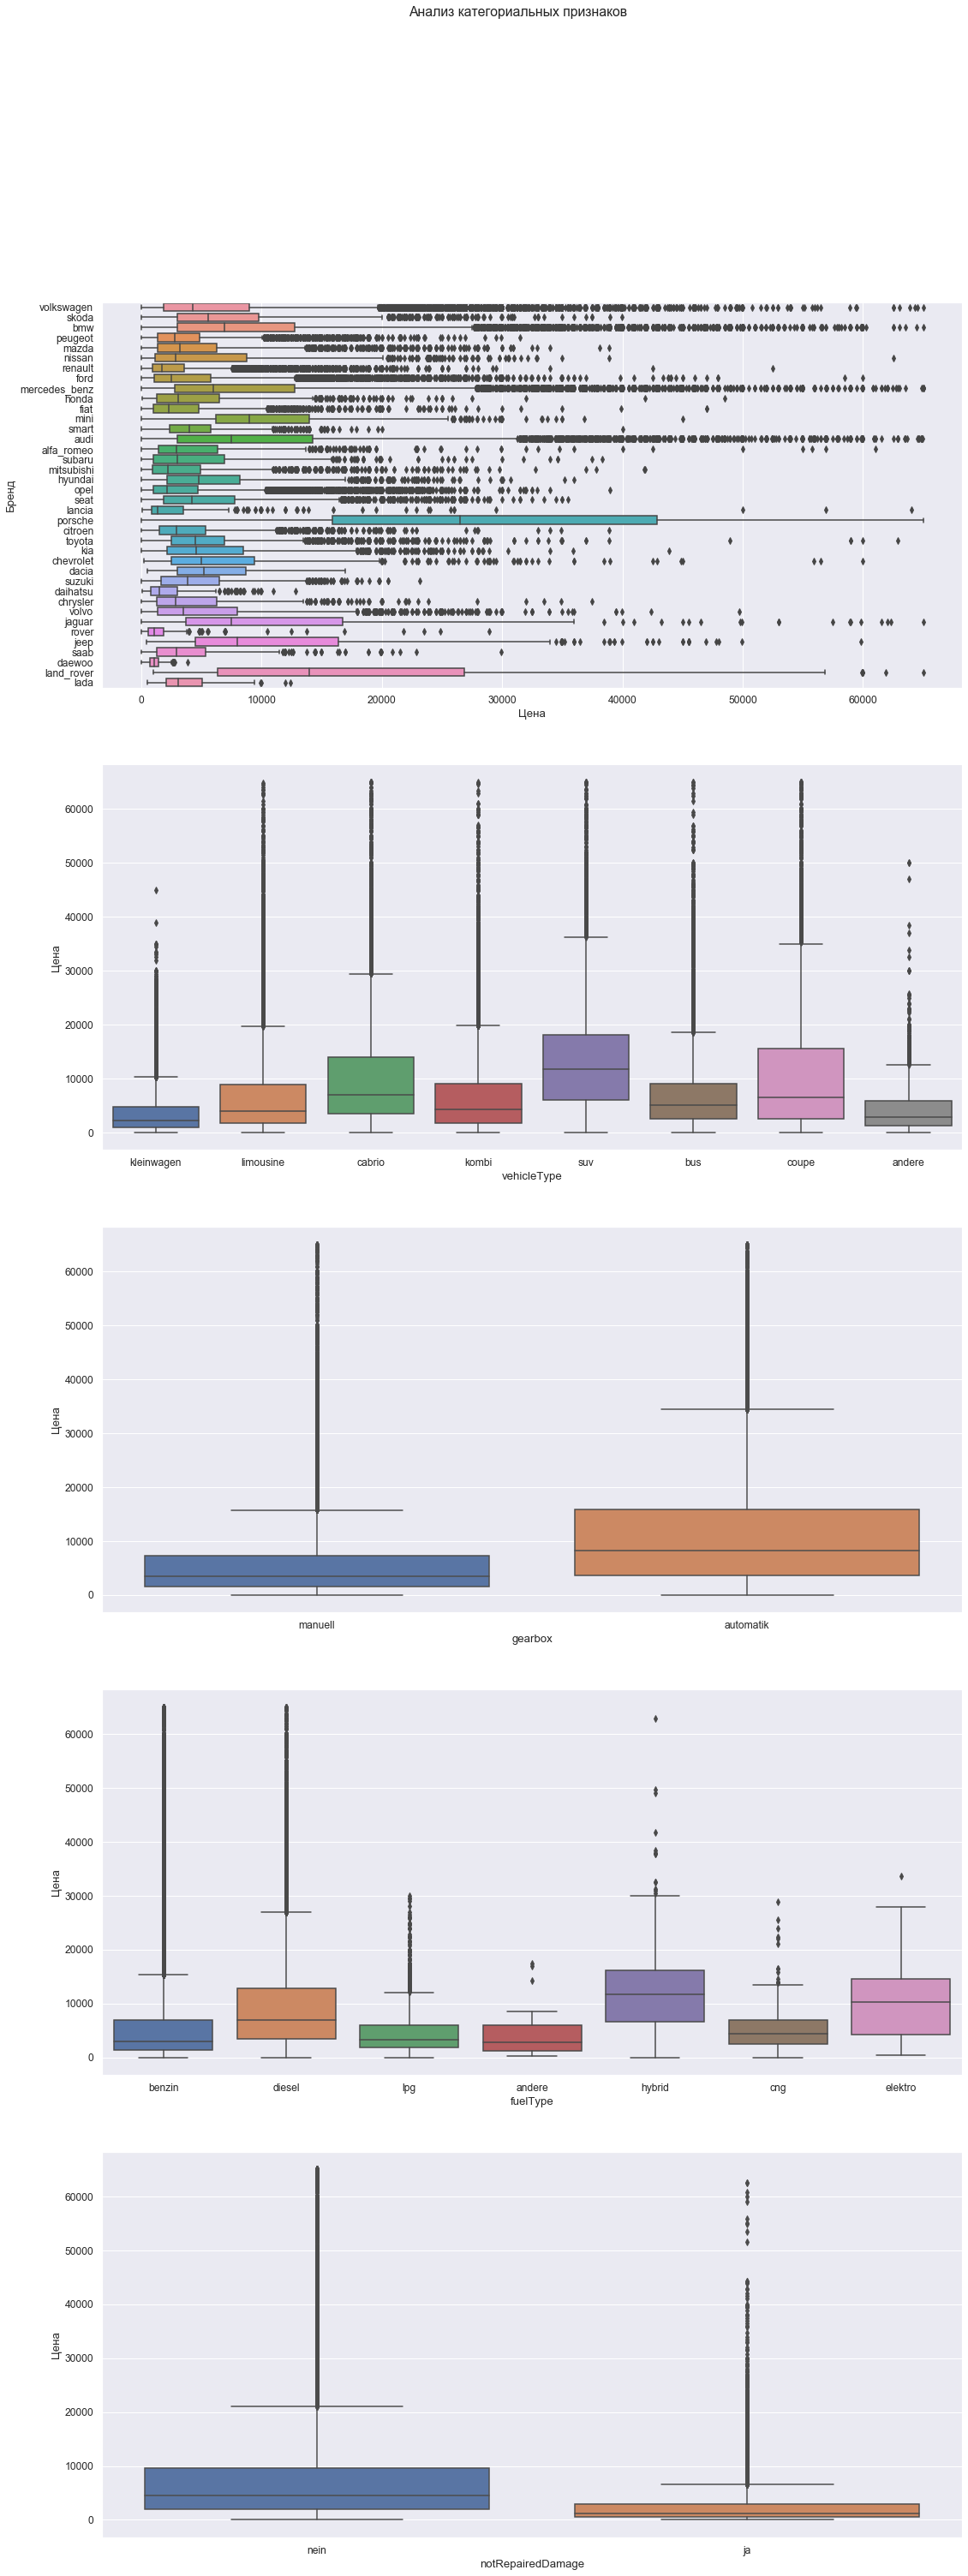

In [19]:
fig , ax = plt.subplots(nrows = len(data.select_dtypes(['object', 'bool']).columns) - 1, ncols = 1, figsize=(18, 48))
counter = 0
fig.suptitle("Анализ категориальных признаков")
for category in data.select_dtypes(['object', 'bool']):
    if category == 'brand':
        one = sns.boxplot(y=data[category], x = data.price, ax=ax[counter])
        one.set(xlabel='Цена', ylabel='Бренд')
        counter += 1
    elif category != 'model':
        one = sns.boxplot(x=data[category], y = data.price, ax=ax[counter])
        one.set(xlabel=category, ylabel='Цена')
        counter += 1

Колонки в данных:

* `brand` - название бренда автомобиля
* `model` - название модели автомобиля
* `vehicleType` - тип транспортного средства
* `gearbox` - тип трансмисcии
* `fuelType` - какой вид топлива использует автомобиль
* `notRepairedDamage` - есть ли в автомобиле неисправность, которая еще не устранена
* `powerPS` - мощность автомобиля в PS (метрическая лошадиная сила)
* `kilometer` - сколько километров проехал автомобиль, пробег
* `autoAgeMonths` - возраст автомобиля в месяцах


* `price` - цена, указанная в объявлении о продаже автомобиля (целевая переменная)

In [20]:
data.notRepairedDamage = data.notRepairedDamage == 'ja'
data.gearbox = data.gearbox == 'automatik'
data = data[data.powerPS <= 500]

In [21]:
categorical = ['brand', 'model', 'vehicleType', 'fuelType']
numeric = ['powerPS', 'kilometer', 'autoAgeMonths']
other = ['gearbox', 'notRepairedDamage']

In [22]:
data.price = np.log1p(data.price)
x = data[categorical + numeric + other]
y = data['price']

x['bias'] = 1
other += ['bias']

In [23]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler


column_transformer = ColumnTransformer([
    ('ohe', OneHotEncoder(handle_unknown='ignore'), categorical),
    ('scaling', StandardScaler(), numeric),
    ('other',  'passthrough', other)
])

x = column_transformer.fit_transform(x)

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)
x_valid, x_test, y_valid, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=10)

## Задание 5. Сравнение методов градиентного спуска (2 балла)

В этом задании вам предстоит сравнить методы градиентного спуска на подготовленных вами данных из предыдущего задания.

### Задание 5.1. Подбор оптимальной длины шага (1 балл)

Подберите по валидационной выборке наилучшую длину шага $\lambda$ для каждого метода с точки зрения ошибки. Для этого сделайте перебор по логарифмической сетке. Для каждого метода посчитайте ошибку на обучающей и тестовой выборках, посчитайте качество по метрике $R^2$, сохраните количество итераций до сходимости.

Все параметры кроме `lambda_` стоит выставить равным значениям по умолчанию.

In [25]:
from descents import get_descent
from sklearn.metrics import mean_squared_error, r2_score
from linear_regression import LinearRegression
from math import inf

lambdas_R = np.logspace(-2, 3, num=30)
methods = ['full', 'stochastic', 'momentum', 'adam']
df_tmp = pd.DataFrame(columns=['lambdas', 'full', 'stochastic', 'momentum', 'adam'])
df_tmp.lambdas = lambdas_R
df_tmp.set_index('lambdas', inplace=True)
best_results = {}
best_regrs = {}
for method in methods:
    best = inf
    for value in lambdas_R:
        descent_config = {
                'descent_name': method,
                'kwargs': {
                    'dimension': 308,
                    'lambda_': value
                }
            }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(x_train, np.asarray(y_train))
        yv_error = np.sqrt(regression.calc_loss(x_valid, y_valid))
        if yv_error < best:
            best_reg = regression
            best = yv_error
            best_lam = value
        df_tmp.at[value, method] = yv_error
        
    yte_error = np.sqrt(best_reg.calc_loss(x_test, y_test))
    ytr_error = np.sqrt(best_reg.calc_loss(x_train, y_train))
    y_pred = best_reg.predict(x_test)
    r2_test = r2_score(y_test, y_pred)
    y_pred_tr = best_reg.predict(x_train)
    r2_train = r2_score(y_train, y_pred_tr)
    res = [ytr_error, yte_error, best, value, regression.descent.lr.iteration, r2_train, r2_test]    
    print("Best for", method, "are the following results:")
    print("Lambda value:", best_lam)
    print("Train error:", ytr_error)
    print("Validation error:", best)
    print("Test error:", yte_error)
    print("Number of iterations:", best_reg.descent.lr.iteration)
    print("R2 score: train", r2_train, "and test", r2_test)
    print("-----------------------")
    best_results[method] = res
    best_regrs[method] = best_reg

/Users/andreyborevskiy/Downloads/descents.py:49: RuntimeWarning: overflow encountered in matmul
  return (1 / y.shape[0]) * (sqr.T @ sqr)
/Users/andreyborevskiy/Downloads/descents.py:61: RuntimeWarning: invalid value encountered in subtract
  self.w -= delta


Best for full are the following results:
Lambda value: 2.592943797404667
Train error: 0.6135504858534319
Validation error: 0.6089117180673842
Test error: 0.6263287233915457
Number of iterations: 61
R2 score: train 0.7133860018309204 and test 0.7021817598915108
-----------------------


/Users/andreyborevskiy/Downloads/descents.py:49: RuntimeWarning: overflow encountered in matmul
  return (1 / y.shape[0]) * (sqr.T @ sqr)
/Users/andreyborevskiy/Downloads/descents.py:61: RuntimeWarning: invalid value encountered in subtract
  self.w -= delta
/Users/andreyborevskiy/Downloads/descents.py:60: RuntimeWarning: overflow encountered in multiply
  delta = self.lr() * gradient


Best for stochastic are the following results:
Lambda value: 0.7880462815669912
Train error: 0.6348367611359735
Validation error: 0.6295031396386848
Test error: 0.6471144797506754
Number of iterations: 300
R2 score: train 0.6931536771171847 and test 0.6820865731060775
-----------------------


/Users/andreyborevskiy/Downloads/descents.py:49: RuntimeWarning: overflow encountered in matmul
  return (1 / y.shape[0]) * (sqr.T @ sqr)
/Users/andreyborevskiy/Downloads/descents.py:91: RuntimeWarning: invalid value encountered in add
  self.h = self.h * self.alpha + self.lr() * gradient


Best for momentum are the following results:
Lambda value: 1.743328822199989
Train error: 0.5791383034895473
Validation error: 0.5749599853236248
Test error: 0.597241099494233
Number of iterations: 136
R2 score: train 0.744635003094662 and test 0.7292016537527586
-----------------------
Best for adam are the following results:
Lambda value: 28.072162039411786
Train error: 0.5678822383088459
Validation error: 0.5646737886281401
Test error: 0.5874863467270686
Number of iterations: 182
R2 score: train 0.7544650272204856 and test 0.7379753248882687
-----------------------


/Users/andreyborevskiy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Users/andreyborevskiy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/Users/andreyborevskiy/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


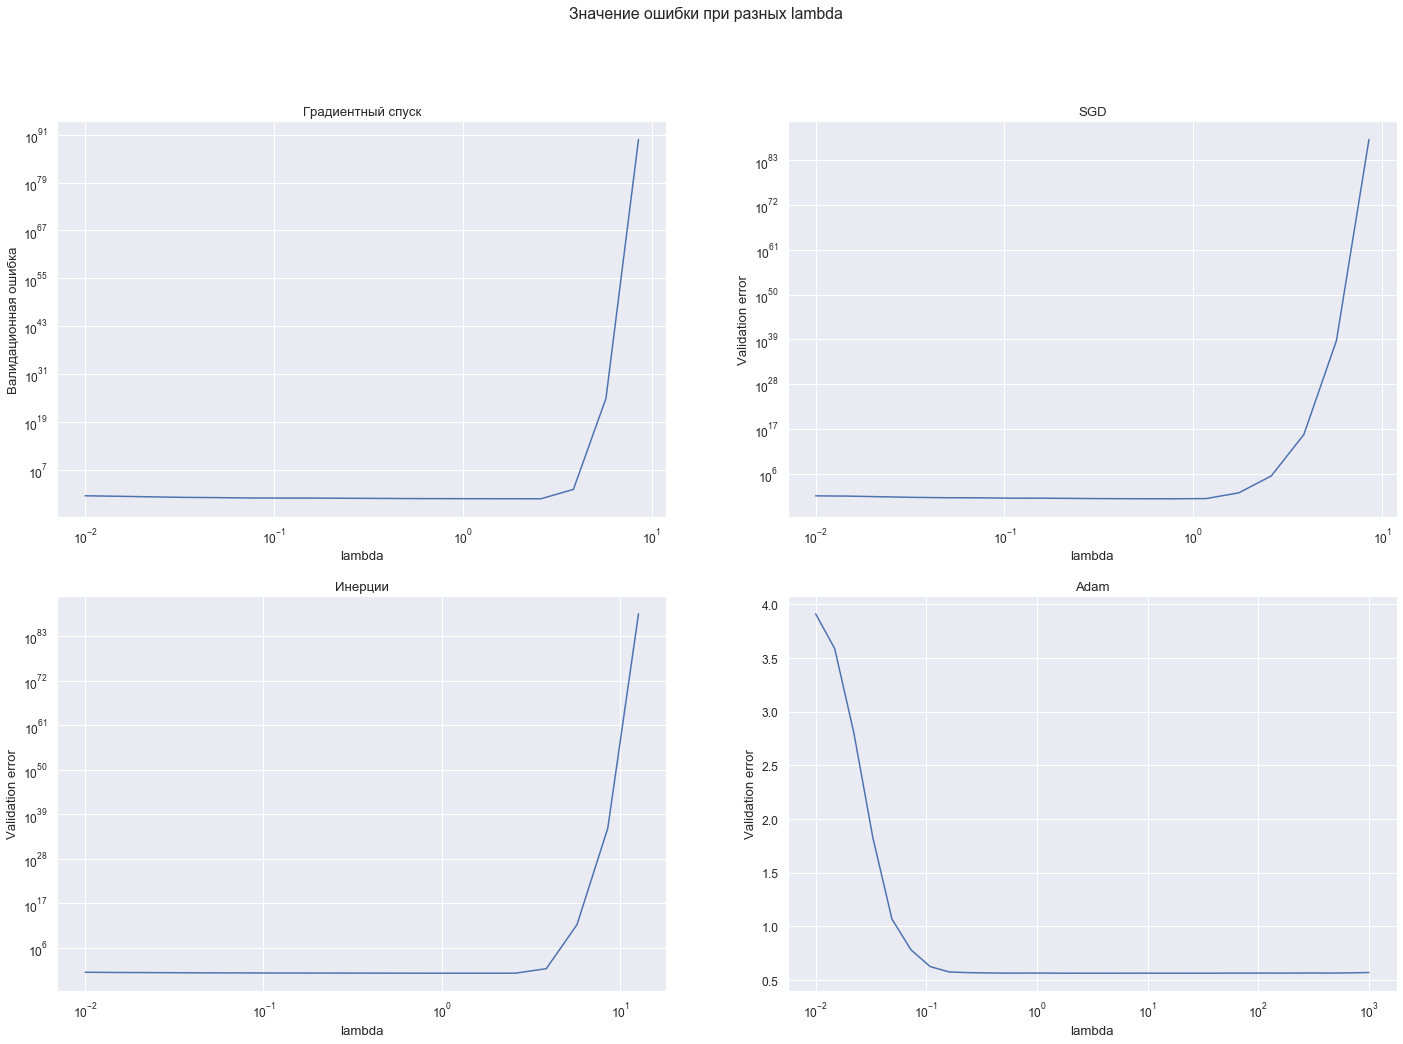

In [26]:
fig , ax = plt.subplots(nrows = 2, ncols = 2, figsize=(24, 16))
fig.suptitle('Значение ошибки при разных lambda')
ax[0][0].plot(df_tmp.index, df_tmp.full)
ax[0][0].set_xscale("log")
ax[0][0].set_yscale("log")
ax[0][0].set_xlabel("lambda")
ax[0][0].set_ylabel("Валидационная ошибка")
ax[0][0].set_title("Градиентный спуск")
ax[0][1].plot(df_tmp.index, df_tmp.stochastic)
ax[0][1].set_xscale("log")
ax[0][1].set_yscale("log")
ax[0][1].set_xlabel("lambda")
ax[0][1].set_ylabel("Validation error")
ax[0][1].set_title("SGD")
ax[1][0].plot(df_tmp.index, df_tmp.momentum)
ax[1][0].set_xscale("log")
ax[1][0].set_yscale("log")
ax[1][0].set_xlabel("lambda")
ax[1][0].set_ylabel("Validation error")
ax[1][0].set_title("Инерции")
ax[1][1].plot(df_tmp.index, df_tmp.adam)
ax[1][1].set_xscale("log")
ax[1][1].set_xlabel("lambda")
ax[1][1].set_ylabel("Validation error")
ax[1][1].set_title("Adam")
plt.show()

### Задание 5.2. Сравнение методов (1 балла) 

Постройте график зависимости ошибки на обучающей выборке от номера итерации (все методы на одном графике).

Посмотрите на получившиеся результаты (таблички с метриками и график). Сравните методы между собой.

In [27]:
df = pd.DataFrame(columns = ['iteration', 'full', 'stochastic', 'momentum', 'adam'])
df.iteration = np.arange(301)
for method in methods:
    errors = best_regrs[method].loss_history
    df[method] = errors + [np.NaN] * (301 - len(errors))
df = df.melt(id_vars=['iteration'], value_vars=['full', 'stochastic', 'momentum', 'adam'])
df.dropna(subset=['value'], inplace=True) 
df_gr = df.copy()

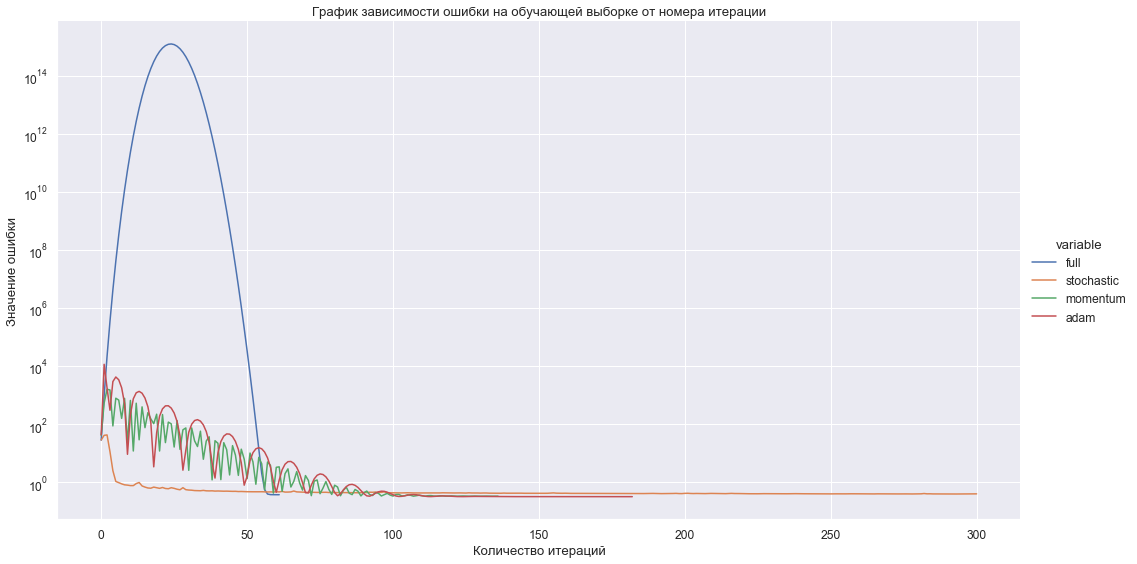

In [28]:
g = sns.relplot(kind='line', data = df, x = 'iteration', y = 'value', hue = 'variable', 
            height=8, aspect=1.8)
g.set(yscale="log", title="График зависимости ошибки на обучающей выборке от номера итерации",
     xlabel = "Количество итераций", ylabel="Значение ошибки")

Виден характер изменения значения ошибки. При этом обычный GD показывает крайне большую дугу и несоизмеримо большее значение ошибки. Характер adam и momentum схож, но дуги намного меньше в высоту. Напротив, белая ворона - SGD - обходится без видимых дугообразных колебаний, но и затрачивает максимальное дефолтное число итераций.

## Задание 6. Стохастический градиентный спуск и размер батча (1 балл)

В этом задании вам предстоит исследовать влияние размера батча на работу стохастического градиентного спуска. 

* Сделайте по несколько запусков (например, k = 10) стохастического градиентного спуска на обучающей выборке для каждого размера батча из перебираемого списка. Замерьте время в секундах и количество итераций до сходимости. Посчитайте среднее этих значений для каждого размера батча.
* Постройте график зависимости количества шагов до сходимости от размера батча.
* Постройте график зависимости времени до сходимости от размера батча.

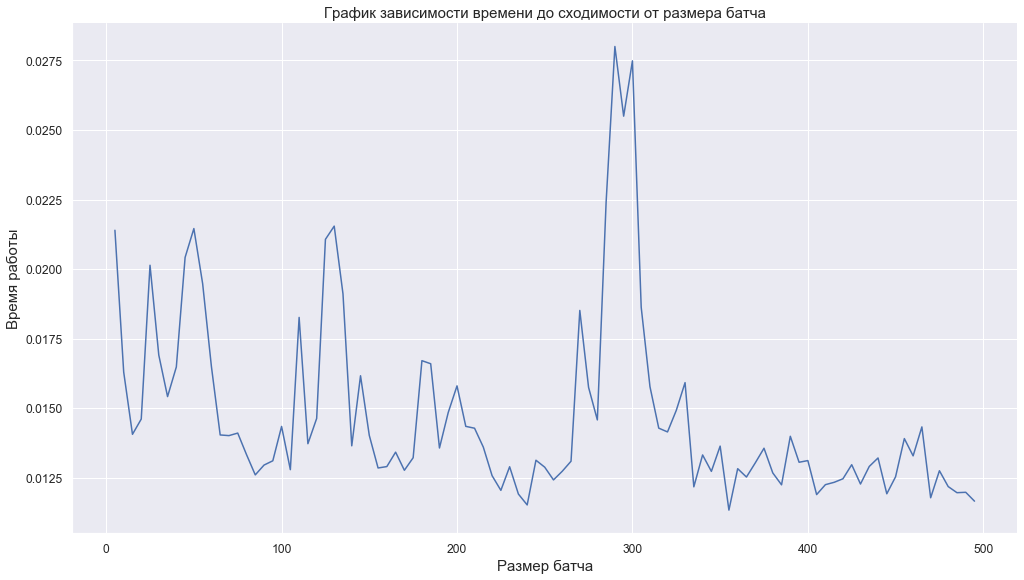

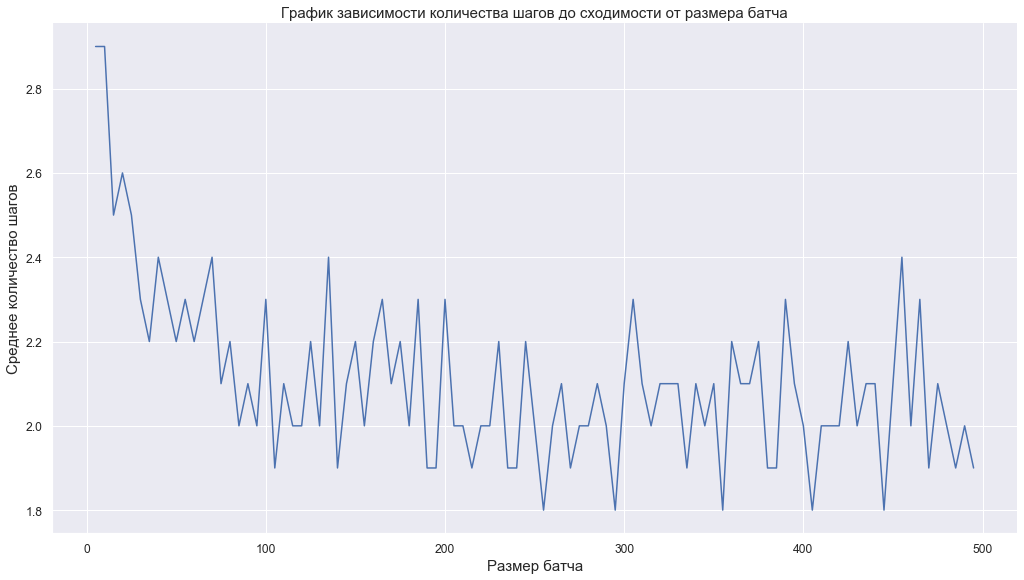

In [29]:
import time
batching = pd.DataFrame(columns=['batch', 'iter', 'time'])
batching.batch = np.arange(5, 500, 5)
batching.set_index('batch', inplace=True)

overall_time = 0
overall_steps = 0
for value in batching.index:
    for repeat in range(10):
        descent_config = {
                'descent_name': 'stochastic',
            'kwargs': {
                    'dimension': 308,
                    'batch_size': value
            }
        }
        regression = LinearRegression(descent_config=descent_config)
        start = time.time()
        regression.fit(x_train, np.asarray(y_train))
        overall_time += time.time() - start
        overall_steps += regression.descent.lr.iteration
    batching.at[value, 'iter'] = overall_steps / 10
    batching.at[value, 'time'] = overall_time / 10
    overall_steps, overall_time = 0, 0




g = sns.relplot(kind='line', data = batching, x = 'batch', y = 'time', height=8, aspect=1.8)
plt.xlabel("Размер батча", fontsize=15)
plt.ylabel("Время работы", fontsize=15)
plt.title("График зависимости времени до сходимости от размера батча", fontsize=15)
plt.show()
gg = sns.relplot(kind='line', data = batching, x = 'batch', y = 'iter', height=8, aspect=1.8)
plt.xlabel("Размер батча", fontsize=15)
plt.ylabel("Среднее количество шагов", fontsize=15)
plt.title("График зависимости количества шагов до сходимости от размера батча", fontsize=15)
plt.show()

Посмотрите на получившиеся результаты. Какие выводы можно сделать про подбор размера батча для стохастического градиентного спуска?

Ответ: В целом, можно увидеть общий тренд несмортря на определенные колебания. В случае со средним количеством шагов, график стремится к определенной асимптоте на уровне 2.1 шагов. Она достигается уже с размера 70-80 и остается на этом уровне, что абсолютно обессмысливает увеличение батча. Схожая ситуация с графиком времени. За исключением неожиданного выброса при батче = 450, также достигается асимптота, чуть большая 0.01, с размера = 30-40.

## Задание 7. Регуляризация (1 балл)

В этом задании вам предстоит исследовать влияние регуляризации на работу различных методов градиентного спуска. Напомним, регуляризация - это добавка к функции потерь, которая штрафует за норму весов. Мы будем использовать l2 регуляризацию, таким образом функция потерь приобретает следующий вид:

$$
    Q(w) = \dfrac{1}{\ell} \sum\limits_{i=1}^{\ell} (a_w(x_i) - y_i)^2 + \dfrac{\mu}{2} \| w \|^2
$$

Допишите класс **BaseDescentReg** в файле `descents.py`.

Протестируйте ваше решение в контесте.

Вставьте ссылку на успешную посылку:

* **BaseDescentReg**: https://contest.yandex.ru/contest/29933/run-report/55541132/

Найдите лучшие параметры обучения с регуляризацией аналогично 5 заданию. Будем подбирать длину шага $\lambda$ (`lambda_`) и коэффициент регуляризации $\mu$ (`mu`).

Сравните для каждого метода результаты с регуляризацией и без регуляризации (нужно опять сохранить ошибку и качество по метрике $R^2$ на обучающей и тестовой выборках и количество итераций до сходимости).

Постройте для каждого метода график со значениями функции потерь MSE с регуляризацией и без регуляризации (всего должно получиться 4 графика).

In [30]:
lambdas_R = np.logspace(-2, 3, num=25)
mu_R = np.logspace(-3, -2, num=5)
methods = ['full', 'stochastic', 'momentum', 'adam']
best_reg_results = {}
best_regreg = {}
for method in methods:
    best = inf
    for m_value in mu_R:
        for value in lambdas_R:
            descent_config = {
                    'descent_name': method,
                    'regularized': True,
                    'kwargs': {
                        'dimension': 308,
                        'lambda_': value,
                        'mu': m_value
                    }
                }
            regression = LinearRegression(descent_config=descent_config)
            regression.fit(x_train, np.asarray(y_train))
            yv_error = np.sqrt(regression.calc_loss(x_valid, y_valid))
            if yv_error < best:
                best_reg = regression
                best = yv_error
                best_lam = value
                best_mu = m_value
        
    yte_error = np.sqrt(best_reg.calc_loss(x_test, y_test))
    ytr_error = np.sqrt(best_reg.calc_loss(x_train, y_train))
    y_pred_train = best_reg.predict(x_train)
    r2_train = r2_score(y_train, y_pred_train)
    y_pred = best_reg.predict(x_test)
    r2_test = r2_score(y_test, y_pred)
    res = [ytr_error, yte_error, best, value, best_reg.descent.lr.iteration, r2_train, r2_test]  
    print("Best for", method, "are the following results:")
    print("Regularization coefficient:", best_mu)
    print("Lambda value:", best_lam)
    print("Train error:", ytr_error)
    print("Validation error:", best)
    print("Test error:", yte_error)
    print("Number of iterations:", best_reg.descent.lr.iteration)
    print("R2 score: train", r2_train, "and test", r2_test)
    print("-----------------------")
    best_reg_results[method] = res
    best_regreg[method] = best_reg

/Users/andreyborevskiy/Downloads/descents.py:49: RuntimeWarning: overflow encountered in matmul
  return (1 / y.shape[0]) * (sqr.T @ sqr)


Best for full are the following results:
Regularization coefficient: 0.0017782794100389228
Lambda value: 3.1622776601683795
Train error: 0.6228295268060458
Validation error: 0.6172255394203313
Test error: 0.6328995783053072
Number of iterations: 269
R2 score: train 0.7046512241477105 and test 0.6959001206753019
-----------------------


/Users/andreyborevskiy/Downloads/descents.py:49: RuntimeWarning: overflow encountered in matmul
  return (1 / y.shape[0]) * (sqr.T @ sqr)
/Users/andreyborevskiy/Downloads/descents.py:60: RuntimeWarning: overflow encountered in multiply
  delta = self.lr() * gradient
/Users/andreyborevskiy/Downloads/descents.py:61: RuntimeWarning: invalid value encountered in subtract
  self.w -= delta
/Users/andreyborevskiy/Downloads/descents.py:61: RuntimeWarning: overflow encountered in subtract
  self.w -= delta


Best for stochastic are the following results:
Regularization coefficient: 0.0017782794100389228
Lambda value: 1.2115276586285888
Train error: 0.6677709463503936
Validation error: 0.6631544683847866
Test error: 0.6773469343275066
Number of iterations: 300
R2 score: train 0.6604905804779923 and test 0.6516875690995808
-----------------------


/Users/andreyborevskiy/Downloads/descents.py:49: RuntimeWarning: overflow encountered in matmul
  return (1 / y.shape[0]) * (sqr.T @ sqr)
/Users/andreyborevskiy/Downloads/descents.py:91: RuntimeWarning: invalid value encountered in add
  self.h = self.h * self.alpha + self.lr() * gradient


Best for momentum are the following results:
Regularization coefficient: 0.001
Lambda value: 3.1622776601683795
Train error: 0.5811239261573604
Validation error: 0.5760580628792594
Test error: 0.596917509252504
Number of iterations: 300
R2 score: train 0.7428809220089785 and test 0.7294950158930525
-----------------------
Best for adam are the following results:
Regularization coefficient: 0.001
Lambda value: 5.10896977450693
Train error: 0.5780979919890592
Validation error: 0.5733780590448067
Test error: 0.5946885909635526
Number of iterations: 300
R2 score: train 0.7455516081215212 and test 0.7315114010914978
-----------------------


In [31]:
for method in methods:
    print("Comparison for", method)
    print("Train error: with", best_reg_results[method][0], " & without", best_results[method][0])
    print("Test error: with", best_reg_results[method][1], " & without", best_results[method][1])
    print("R2 for train: with", best_reg_results[method][5], " & without", best_results[method][5])
    print("R2 for test: with", best_reg_results[method][6], " & without", best_results[method][6])
    print("№ of iterations: with", best_reg_results[method][4], " & without", best_results[method][4])

Comparison for full
Train error: with 0.6228295268060458  & without 0.6135504858534319
Test error: with 0.6328995783053072  & without 0.6263287233915457
R2 for train: with 0.7046512241477105  & without 0.7133860018309204
R2 for test: with 0.6959001206753019  & without 0.7021817598915108
№ of iterations: with 269  & without 112
Comparison for stochastic
Train error: with 0.6677709463503936  & without 0.6348367611359735
Test error: with 0.6773469343275066  & without 0.6471144797506754
R2 for train: with 0.6604905804779923  & without 0.6931536771171847
R2 for test: with 0.6516875690995808  & without 0.6820865731060775
№ of iterations: with 300  & without 112
Comparison for momentum
Train error: with 0.5811239261573604  & without 0.5791383034895473
Test error: with 0.596917509252504  & without 0.597241099494233
R2 for train: with 0.7428809220089785  & without 0.744635003094662
R2 for test: with 0.7294950158930525  & without 0.7292016537527586
№ of iterations: with 300  & without 112
Compar

Посмотрите на получившиеся результаты. Какие можно сделать выводы, как регуляризация влияет на сходимость? Как изменилось качество на обучающей выборке? На тестовой? Чем вы можете объяснить это?

Ответ: Можно увидеть, что регуляризация при сравнении лучших результатов дает более плохой результат как на обучающей, так и на тестовых выборках на всех методах. В то же время, если смотреть графики, можно увидеть меньшее значение ошибок везде кроме momentum вплоть до последних итераций. Также интересно отметить, что число итераций везде с регуляризацией занимает максимальное дефолтное значение. Объяснение кроется в общем эффекте регуляризации. Изначально лучшие результаты с регуляризацией говорят о положительном избежании переобучения. Однако при увеличении числа итерации негативный эффект переобучения пропадает и потребность в регуляризации пропадает. Плюс регуляризация не позволяет сделать ошибку на определенном этапе меньше tolerance

In [32]:
df = pd.DataFrame(columns = ['iteration', 'full', 'stochastic', 'momentum', 'adam'])
df.iteration = np.arange(301)
for method in methods:
    errors = best_regreg[method].loss_history
    df[method] = errors + [np.NaN] * (301 - len(errors))
df.columns = ['iteration', 'full_reg', 'stochastic_reg', 'momentum_reg', 'adam_reg']
df = df.melt(id_vars=['iteration'], value_vars=['full_reg', 'stochastic_reg', 'momentum_reg', 'adam_reg'])
df.dropna(subset=['value'], inplace=True) 

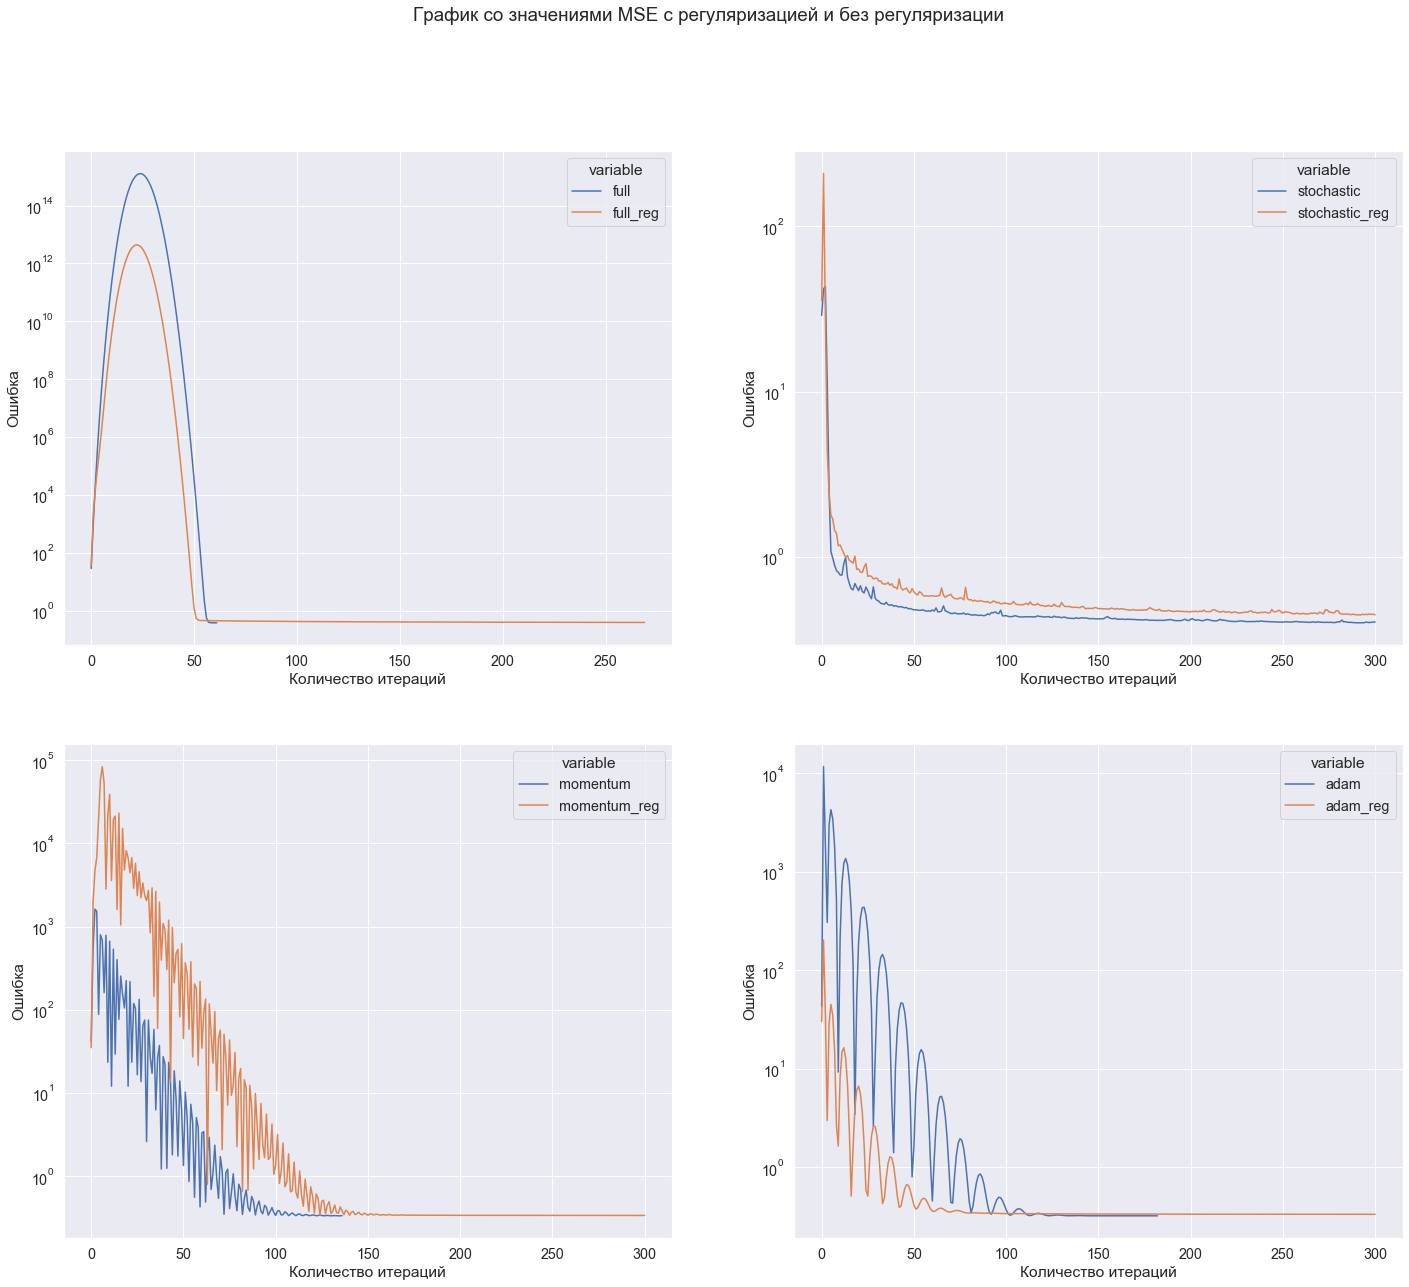

In [33]:
sns.set(font_scale=1.3)
resolve = pd.concat([df_gr, df], axis=0).reset_index(drop=True)
fig , ax = plt.subplots(nrows = 2, ncols = 2, figsize=(24, 20))
fig.suptitle("График со значениями MSE с регуляризацией и без регуляризации ")
g = sns.lineplot(ax=ax[0][0], data = resolve.loc[resolve['variable'].isin(['full', 'full_reg'])], 
             x = 'iteration', y = 'value', hue = 'variable')
g.set(yscale='log', ylabel="Ошибка", xlabel="Количество итераций")
gg = sns.lineplot(ax=ax[0][1], data = resolve.loc[resolve['variable'].isin(['stochastic', 'stochastic_reg'])], 
             x = 'iteration', y = 'value', hue = 'variable')
gg.set(yscale='log', ylabel="Ошибка", xlabel="Количество итераций")
ggg = sns.lineplot(ax=ax[1][0], data = resolve.loc[resolve['variable'].isin(['momentum', 'momentum_reg'])], 
             x = 'iteration', y = 'value', hue = 'variable')
ggg.set(yscale='log', ylabel="Ошибка", xlabel="Количество итераций")
gggg = sns.lineplot(ax=ax[1][1], data = resolve.loc[resolve['variable'].isin(['adam', 'adam_reg'])], 
             x = 'iteration', y = 'value', hue = 'variable')
gggg.set(yscale='log', ylabel="Ошибка", xlabel="Количество итераций")
plt.show()

`### ваше решение тут ###`

## Задание 8. Альтернативная функция потерь (1 балл)

В этом задании вам предстоит использовать другую функцию потерь для нашей задачи регресии. В качестве функции потерь мы выбрали **Log-Cosh**:

$$
    L(y, a)
    =
    \log\left(\cosh(a - y)\right).
$$

Самостоятельно продифференцируйте данную функцию потерь чтобы найти её градиент:

$$
\frac{1}{\ell}\sum\triangledown_w \ L(y_i, a_i) = \frac{1}{\ell}\sum\frac{1}{\cosh(a_i-y_i)} \cdot \sinh(a_i-y_i) \cdot \triangledown_w (a_i-y_i) = \frac{1}{\ell}\sum \tanh(a_i-y_i)x_i = \frac{x_i \cdot \tanh(a_i-y_i)}{\ell}
$$

Программно реализуйте градиентный спуск с данной функцией потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

In [35]:
from descents import LossFunction
lambdas_R = np.logspace(-2, 3, num=30)
methods = ['full', 'stochastic', 'momentum', 'adam']
df_tmp = pd.DataFrame(columns=['lambdas', 'full', 'stochastic', 'momentum', 'adam'])
df_tmp.lambdas = lambdas_R
df_tmp.set_index('lambdas', inplace=True)
best_results_log = {}
best_regrs_log = {}
for method in methods:
    best = inf
    for value in lambdas_R:
        descent_config = {
                'descent_name': method,
                'kwargs': {
                    'loss_function': LossFunction.LogCosh,
                    'dimension': 308,
                    'lambda_': value
                }
            }
        regression = LinearRegression(descent_config=descent_config)
        regression.fit(x_train, np.asarray(y_train))
        yv_error = np.sqrt(regression.calc_loss(x_valid, y_valid))
        if yv_error < best:
            best_reg = regression
            best = yv_error
            best_lam = value
        df_tmp.at[value, method] = yv_error
        
    yte_error = np.sqrt(best_reg.calc_loss(x_test, y_test))
    ytr_error = np.sqrt(best_reg.calc_loss(x_train, y_train))
    y_pred = best_reg.predict(x_test)
    r2_test = r2_score(y_test, y_pred)
    y_pred_tr = best_reg.predict(x_train)
    r2_train = r2_score(y_train, y_pred_tr)
    res = [ytr_error, yte_error, best, value, regression.descent.lr.iteration, r2_train, r2_test]    
    print("Best for", method, "are the following results:")
    print("Lambda value:", best_lam)
    print("Train error:", ytr_error)
    print("Validation error:", best)
    print("Test error:", yte_error)
    print("Number of iterations:", best_reg.descent.lr.iteration)
    print("R2 score: train", r2_train, "and test", r2_test)
    print("-----------------------")
    best_results_log[method] = res
    best_regrs_log[method] = best_reg

/Users/andreyborevskiy/Downloads/descents.py:51: RuntimeWarning: overflow encountered in cosh
  return (1 / y.shape[0]) *  np.sum(np.log(np.cosh(y - x @ self.w)))


Best for full are the following results:
Lambda value: 18.873918221350976
Train error: 0.3491213929618992
Validation error: 0.34527555883201577
Test error: 0.35181653574005295
Number of iterations: 288
R2 score: train 0.7262544886452574 and test 0.7145845781133173
-----------------------


/Users/andreyborevskiy/Downloads/descents.py:51: RuntimeWarning: overflow encountered in cosh
  return (1 / y.shape[0]) *  np.sum(np.log(np.cosh(y - x @ self.w)))


Best for stochastic are the following results:
Lambda value: 8.531678524172815
Train error: 0.35340630197610523
Validation error: 0.3511034834120373
Test error: 0.3554558633446623
Number of iterations: 300
R2 score: train 0.720431410652866 and test 0.7084947942352404
-----------------------


/Users/andreyborevskiy/Downloads/descents.py:51: RuntimeWarning: overflow encountered in cosh
  return (1 / y.shape[0]) *  np.sum(np.log(np.cosh(y - x @ self.w)))


Best for momentum are the following results:
Lambda value: 12.689610031679234
Train error: 0.33649832290607196
Validation error: 0.3328167019579669
Test error: 0.3405619715138168
Number of iterations: 195
R2 score: train 0.7432891614719004 and test 0.729128680786463
-----------------------


/Users/andreyborevskiy/Downloads/descents.py:51: RuntimeWarning: overflow encountered in cosh
  return (1 / y.shape[0]) *  np.sum(np.log(np.cosh(y - x @ self.w)))


Best for adam are the following results:
Lambda value: 41.753189365604044
Train error: 0.33364079438311806
Validation error: 0.3301818480801147
Test error: 0.3382765779523614
Number of iterations: 282
R2 score: train 0.7481788881970538 and test 0.7326666153238772
-----------------------


In [36]:
#THIS IS WHAT WE GET AFTER!
for method in methods:
    print("Comparison for", method)
    print("Train error: with", best_results_log[method][0], " & without", best_results[method][0])
    print("Test error: with", best_results_log[method][1], " & without", best_results[method][1])
    print("R2 for train: with", best_results_log[method][5], " & without", best_results[method][5])
    print("R2 for test: with", best_results_log[method][6], " & without", best_results[method][6])
    print("№ of iterations: with", best_results_log[method][4], " & without", best_results[method][4])

Comparison for full
Train error: with 0.3491213929618992  & without 0.6135504858534319
Test error: with 0.35181653574005295  & without 0.6263287233915457
R2 for train: with 0.7262544886452574  & without 0.7133860018309204
R2 for test: with 0.7145845781133173  & without 0.7021817598915108
№ of iterations: with 300  & without 112
Comparison for stochastic
Train error: with 0.35340630197610523  & without 0.6348367611359735
Test error: with 0.3554558633446623  & without 0.6471144797506754
R2 for train: with 0.720431410652866  & without 0.6931536771171847
R2 for test: with 0.7084947942352404  & without 0.6820865731060775
№ of iterations: with 300  & without 112
Comparison for momentum
Train error: with 0.33649832290607196  & without 0.5791383034895473
Test error: with 0.3405619715138168  & without 0.597241099494233
R2 for train: with 0.7432891614719004  & without 0.744635003094662
R2 for test: with 0.729128680786463  & without 0.7292016537527586
№ of iterations: with 300  & without 112
Comp

In [290]:
#THIS WAS BEFORE!
for method in methods:
    print("Comparison for", method)
    print("Train error: with", best_results_log[method][0], " & without", best_results[method][0])
    print("Test error: with", best_results_log[method][1], " & without", best_results[method][1])
    print("R2 for train: with", best_results_log[method][5], " & without", best_results[method][5])
    print("R2 for test: with", best_results_log[method][6], " & without", best_results[method][6])
    print("№ of iterations: with", best_results_log[method][4], " & without", best_results[method][4])

Comparison for full
Train error: with 0.35397417292961997  & without 0.613198539971532
Test error: with 0.35594405483068636  & without 0.6275890607569216
R2 for train: with 0.7180969958517827  & without 0.7137147235492272
R2 for test: with 0.7069718167037067  & without 0.7009819774297923
№ of iterations: with 300  & without 112
Comparison for stochastic
Train error: with 0.3559642799557409  & without 0.652577412875363
Test error: with 0.3582738518622653  & without 0.6634027827957507
R2 for train: with 0.7176034542699624  & without 0.675764275194271
R2 for test: with 0.7054514946629691  & without 0.6658809691173067
№ of iterations: with 300  & without 112
Comparison for momentum
Train error: with 0.336374780258399  & without 0.5776743727230416
Test error: with 0.34047820825917935  & without 0.594767219136532
R2 for train: with 0.7437454204355334  & without 0.7459243814213503
R2 for test: with 0.7296777031370343  & without 0.7314403986746899
№ of iterations: with 300  & without 112
Compa

### Социализационный бонус. (0.5 балла).

Как мы знаем, осень прекрасная пора, пора гулять в парках и общаться со своими одногруппниками. Прикрепите фотографию вашей прогулки с минимум пятью одногруппниками по какому-нибудь парку или бульвару. Кратко опишите ваши впечатления.

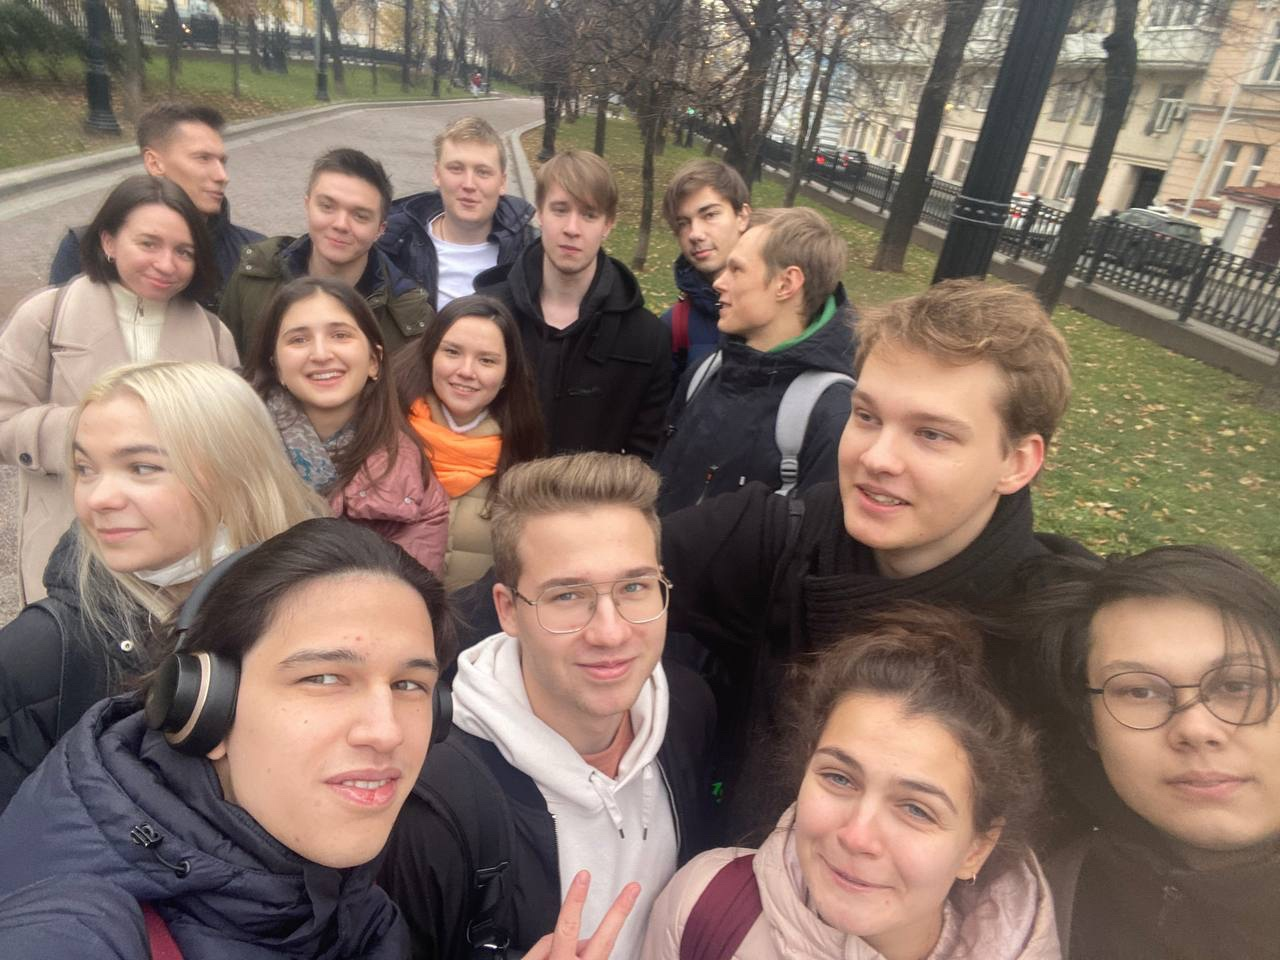

In [294]:
from IPython.display import Image
Image("group_photo.png")

### Бонус 1. Другие методы градиентного спуска (1 балл).

По желанию выберите метод градиентного спуска из следующего списка и самостоятельно реализуйте его в файле `descents.py`. Обучите линейную регрессию с помощью этого метода, сравните с методами из основной части домашнего задания.

`AdaMax` (вариация Adam основанная на $l_{\infty}$), `Nadam` (вариация Adam совмещенная с методом импульса Нестерова), `AMSGrad` (ещё одна вариация Adam).

In [ ]:
# YOUR CODE:

### Бонус 2. Другие функции потерь (1 балл).

Аналогично 8 заданию реализуйте две функции потерь - **MAE** и **Huber**.

Самостоятельно продифференцируйте данные функции потерь, чтобы найти их градиенты:

`### ваше решение тут ###`

Программно реализуйте градиентный спуск с данными функциями потерь в файле `descents.py`, обучите все четыре метода (без регуляризации) аналогично 5 заданию, сравните их качество с четырьмя методами из 5 задания.

Сравните между собой *для каждого метода отдельно* качество для разных функций потерь. Какая оказалась лучше? Как вы думаете почему?

In [ ]:
# YOUR CODE: